<a href="https://colab.research.google.com/github/prawizard/CE888_Repo/blob/main/Lab_6/Task7_Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import cluster, datasets, metrics
import seaborn as sns

In [79]:
country_data=pd.read_csv('https://raw.githubusercontent.com/sagihaider/CE888_2021/main/Lab_6/Data/Country-data.csv')
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [80]:
country_data.values[:,1:]

array([[90.2, 10.0, 7.58, ..., 56.2, 5.82, 553],
       [16.6, 28.0, 6.55, ..., 76.3, 1.65, 4090],
       [27.3, 38.4, 4.17, ..., 76.5, 2.89, 4460],
       ...,
       [23.3, 72.0, 6.84, ..., 73.1, 1.95, 1310],
       [56.3, 30.0, 5.18, ..., 67.5, 4.67, 1310],
       [83.1, 37.0, 5.89, ..., 52.0, 5.4, 1460]], dtype=object)

In [81]:
country_clusters_kmeans=cluster.KMeans(n_clusters=3)
country_clusters_kmeans.fit(country_data.values[:, 1:])
country_clusters_kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 2, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [82]:
country_data.iloc[:, 1:]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [83]:
print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(country_data.iloc[:, 1:], country_clusters_kmeans.labels_))

Silhouette Coefficient: 0.700


In [84]:
country_data['PredictedCategory']=country_clusters_kmeans.labels_+1

In [85]:
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PredictedCategory
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


In [86]:
country_data['PredictedCategory'].value_counts()

1    128
2     32
3      7
Name: PredictedCategory, dtype: int64

In [87]:
two_vars_1=country_data.loc[country_data['PredictedCategory']==1, :].values[:, 1:]
two_vars_2=country_data.loc[country_data['PredictedCategory']==2, :].values[:, 1:]
two_vars_3=country_data.loc[country_data['PredictedCategory']==3, :].values[:, 1:]

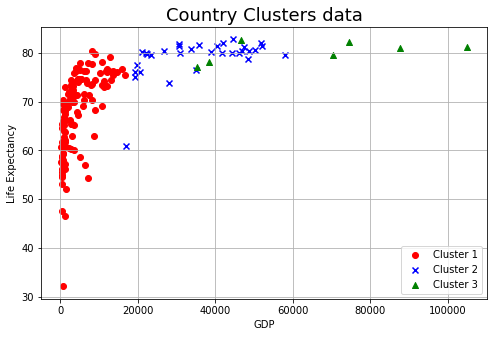

In [88]:
plt.figure(figsize=(8,5))
plt.title("Country Clusters data", fontsize=18)
plt.grid(True)

plt.scatter(two_vars_1[:,-2],two_vars_1[:,6],c='red', marker='o')
plt.scatter(two_vars_2[:,-2],two_vars_2[:,6],c='blue', marker='x')
plt.scatter(two_vars_3[:,-2],two_vars_3[:,6],c='green', marker='^')

plt.xlabel('GDP')
plt.ylabel('Life Expectancy')
plt.legend(['Cluster 1', 'Cluster 2', 'Cluster 3'])
plt.savefig('Country_Clusters.png', dpi=300)
plt.show()

We can observe that the **Cluster 1(In red circles)** elements indicate low income and relatively lower life expectancy. With this observation, it can be concluded that countries in cluster 1 are **under-developed** countries.


The **Cluster 2(In blue crosses)** elements indicate high income and best life expectancy. It can be coincluded that these are **developed** countries.


The **Cluster 3(In green triangles)** elements indicate mediocre/average income and decent life expectancy. The countries in this cluster can be concluded to be **developing** countries.

In [89]:
print('Cluster 1 :', 'Under-Developed Countries')
print('Cluster 2 :', 'Developed Countries')
print('Cluster 3 :', 'Developing Countries')

Cluster 1 : Under-Developed Countries
Cluster 2 : Developed Countries
Cluster 3 : Developing Countries


# Countries among Under-Developed Countries

In [90]:
print('Following are the under-developed countries :')
(country_data.loc[country_data['PredictedCategory']==1, ['country']])

Following are the under-developed countries :


,country
0,Afghanistan
1,Albania
2,Algeria
3,Angola
4,Antigua and Barbuda
...,...
162,Vanuatu
163,Venezuela
164,Vietnam
165,Yemen


#Countries among the Developed countries

In [91]:
print('Following are the developed countries :')
(country_data.loc[country_data['PredictedCategory']==2, ['country']])

Following are the developed countries :


,country
7,Australia
8,Austria
10,Bahamas
11,Bahrain
15,Belgium
29,Canada
42,Cyprus
43,Czech Republic
44,Denmark
49,Equatorial Guinea


# Countries among Developing countries

In [92]:
print('Following are the developing countries :')
country_data.loc[country_data['PredictedCategory']==3, ['country']]

Following are the developing countries :


,country
23,Brunei
82,Kuwait
91,Luxembourg
114,Norway
123,Qatar
133,Singapore
145,Switzerland
